https://www.kaggle.com/code/shamikrana/lung-cancer-prediction-model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/phatjkk/data/main/survey%20lung%20cancer.csv")

In [3]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [5]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [6]:
df["GENDER"].unique()

array(['M', 'F'], dtype=object)

In [7]:
df["LUNG_CANCER"].unique()

array(['YES', 'NO'], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
encoder = LabelEncoder()
df['GENDER'] = encoder.fit_transform(df['GENDER'])
df['LUNG_CANCER'] = encoder.fit_transform(df['LUNG_CANCER'])

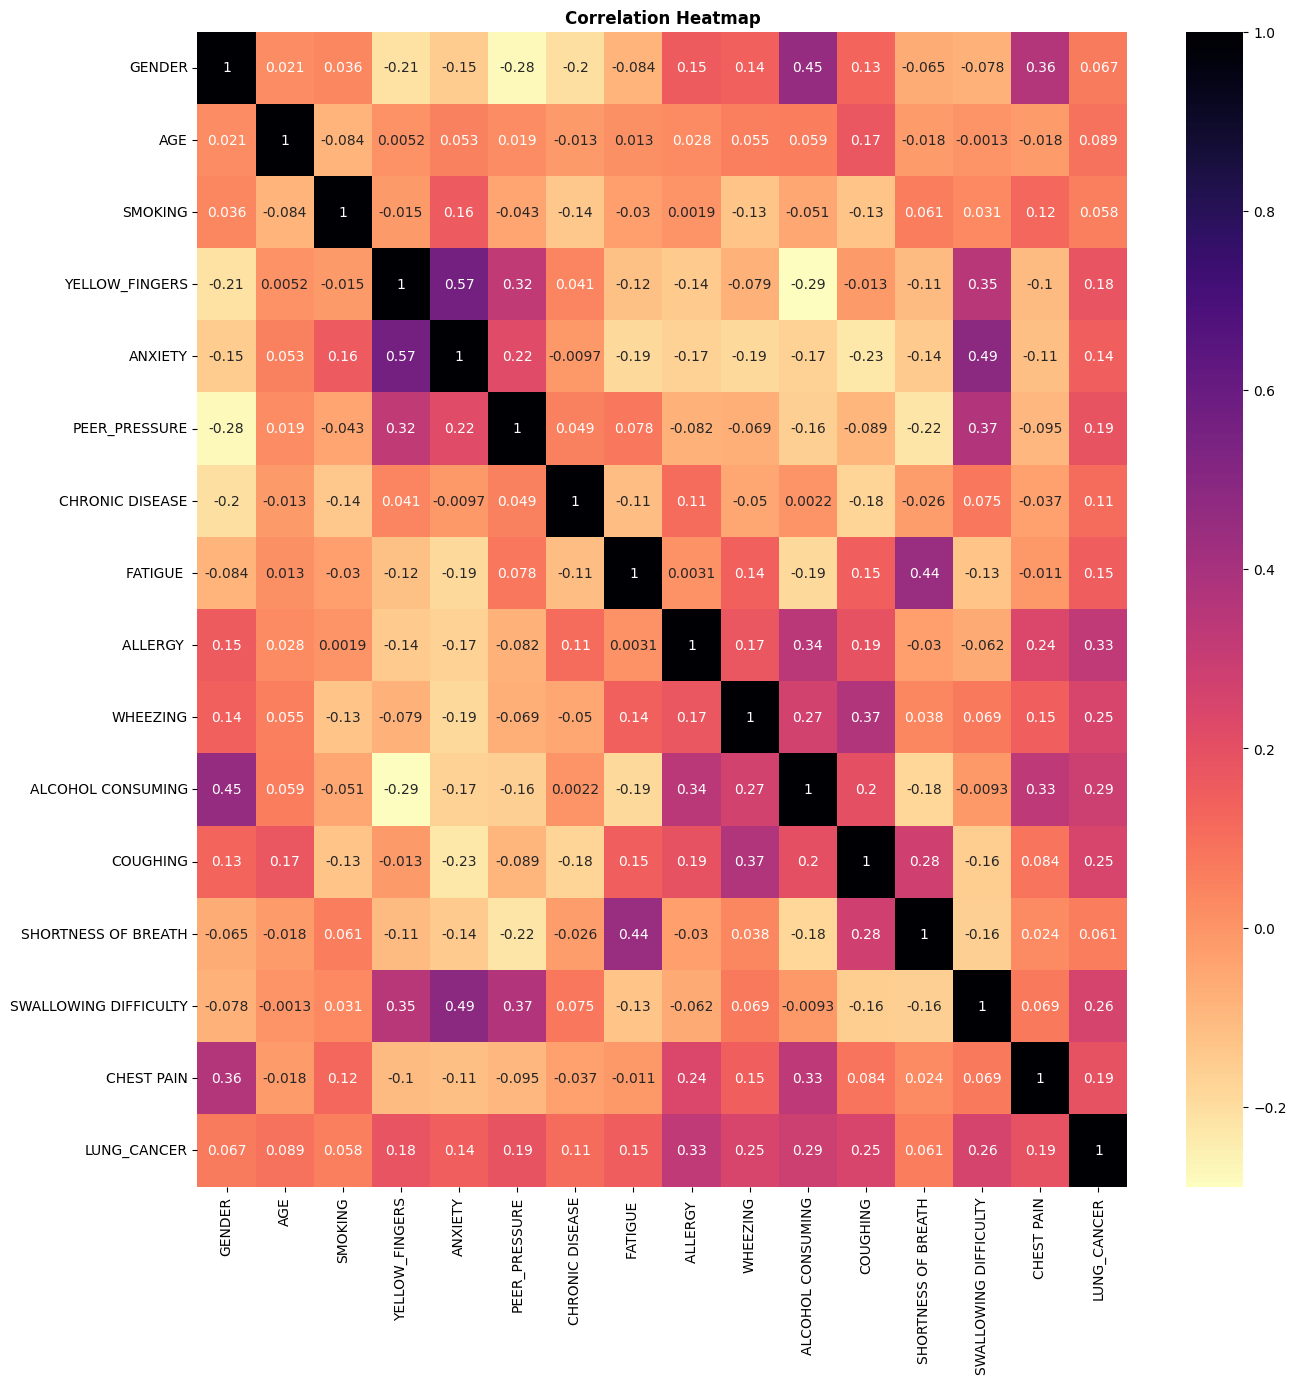

In [10]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot = True, cmap = "magma_r")
plt.title("Correlation Heatmap",fontdict = {"fontweight":"bold"})
plt.show()

In [11]:
x = df.drop(["LUNG_CANCER"], axis = 1)

In [12]:
y = df["LUNG_CANCER"]

In [13]:
x = x.values
y = y.values

In [14]:
x

array([[ 1, 69,  1, ...,  2,  2,  2],
       [ 1, 74,  2, ...,  2,  2,  2],
       [ 0, 59,  1, ...,  2,  1,  2],
       ...,
       [ 1, 58,  2, ...,  1,  1,  2],
       [ 1, 67,  2, ...,  2,  1,  2],
       [ 1, 62,  1, ...,  1,  2,  1]])

In [15]:
y

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [17]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(x_train, y_train)

GaussianNB()

In [18]:
y_pred_train = gnb.predict(x_train)

In [19]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score: 0.9271


In [20]:
x_train[0]

array([ 1, 64,  2,  2,  2,  2,  2,  1,  1,  1,  2,  1,  1,  2,  2])

In [21]:
import pickle
with open('model_lung.pkl','wb') as f:
    pickle.dump(gnb,f)


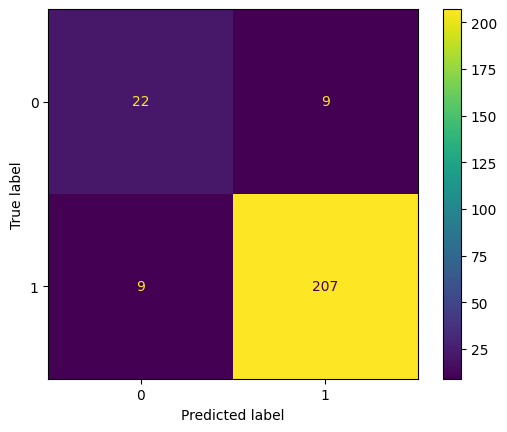

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = gnb.predict(x_train)
cm = confusion_matrix(y_train, predictions, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gnb.classes_)
disp.plot()

In [23]:
from sklearn import metrics
print(metrics.classification_report(y_train, predictions))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71        31
           1       0.96      0.96      0.96       216

    accuracy                           0.93       247
   macro avg       0.83      0.83      0.83       247
weighted avg       0.93      0.93      0.93       247



In [24]:
y_pred = gnb.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8226


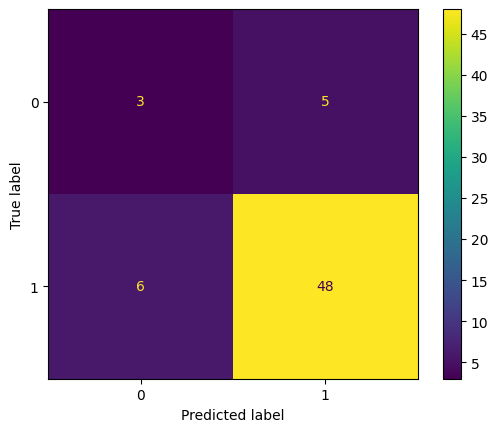

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = gnb.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gnb.classes_)
disp.plot()

In [27]:
from sklearn import metrics
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.33      0.38      0.35         8
           1       0.91      0.89      0.90        54

    accuracy                           0.82        62
   macro avg       0.62      0.63      0.63        62
weighted avg       0.83      0.82      0.83        62

